# Worksheet 19

Name:  
UID: 

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

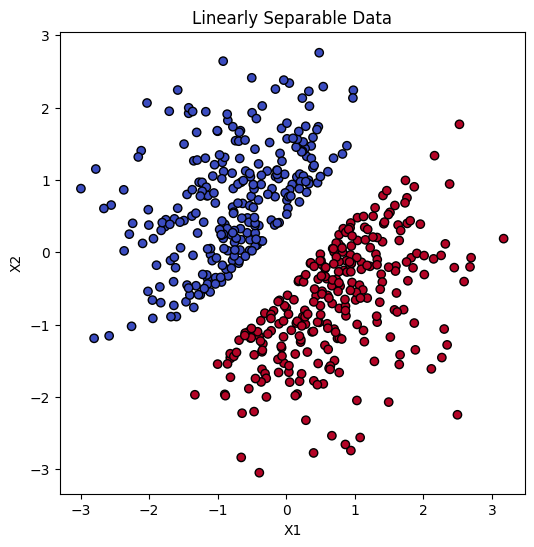

In [2]:


# Your functions and code for generating data

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x: x[0] - x[1] < -0.5 or x[0] - x[1] > 0.5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# Generate linearly separable data
X_line, y_line = generate_line_data()

# Plotting the linearly separable data
plt.figure(figsize=(6, 6))
plt.scatter(X_line[:, 0], X_line[:, 1], c=y_line, cmap='coolwarm', edgecolors='k')
plt.title('Linearly Separable Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [6]:
model = LogisticRegression().fit(X_line, y_line)
print(model.coef_)
print(model.intercept_)

[[ 4.11337993 -4.10105513]]
[0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

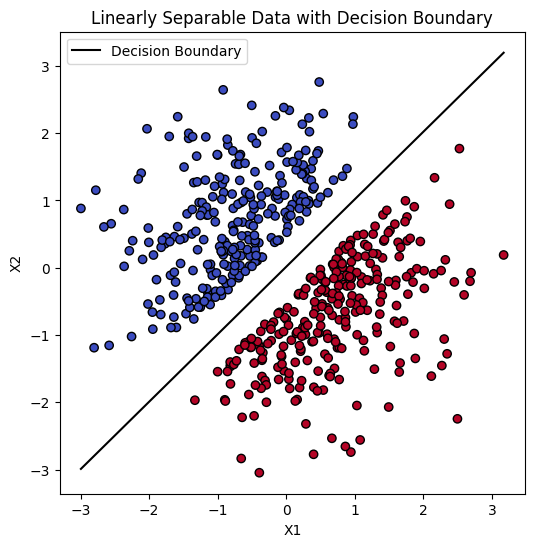

In [7]:


# Generate linearly separable data
X_line, y_line = generate_line_data()

# Train Logistic Regression model
model = LogisticRegression().fit(X_line, y_line)

# Access coefficients and intercept of the trained model
coef = model.coef_[0]
intercept = model.intercept_[0]

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(X_line[:, 0], X_line[:, 1], c=y_line, cmap='coolwarm', edgecolors='k')

# Plotting the decision boundary (line)
x1_vals = np.linspace(np.min(X_line[:, 0]), np.max(X_line[:, 0]), 100)
x2_vals = (-coef[0] * x1_vals - intercept) / coef[1]
plt.plot(x1_vals, x2_vals, 'k-', label='Decision Boundary')

plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

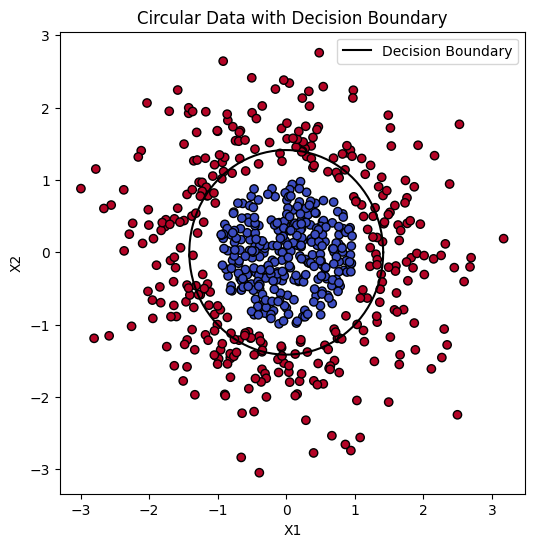

In [8]:
X_circle, y_circle = generate_circle_data(t)

# Train Logistic Regression model
model_circle = LogisticRegression().fit(X_circle, y_circle)

# Access coefficients and intercept of the trained model
coef_circle = model_circle.coef_[0]
intercept_circle = model_circle.intercept_[0]

# Scatter plot of the circular data points
plt.figure(figsize=(6, 6))
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, cmap='coolwarm', edgecolors='k')

# Plotting the decision boundary (circle)
theta = np.linspace(0, 2*np.pi, 100)
x1_circle = centers[0][0] + np.sqrt(2) * np.cos(theta)
x2_circle = centers[0][1] + np.sqrt(2) * np.sin(theta)
plt.plot(x1_circle, x2_circle, 'k-', label='Decision Boundary')

plt.title('Circular Data with Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Your functions and code for generating data

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# CIRCLE (assuming it's an ellipse)
def generate_ellipse_data(t):
    X = np.array(list(filter(lambda x: (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generate ellipse-shaped data
X_ellipse, y_ellipse = generate_ellipse_data(t)

# Perform a polynomial transformation (e.g., quadratic features)
poly = PolynomialFeatures(degree=2)
X_ellipse_transformed = poly.fit_transform(X_ellipse)

# Train Logistic Regression model on the transformed features
model_ellipse = LogisticRegression().fit(X_ellipse_transformed, y_ellipse)

# Print model coefficients and intercept
print("Coefficients:", model_ellipse.coef_)
print("Intercept:", model_ellipse.intercept_)


Coefficients: [[-8.61296914e-06  2.98528608e-02 -4.75348752e-02  4.90954524e+00
   3.79284730e-01  4.95644714e+00]]
Intercept: [-6.47657886]


f) Plot the decision boundary using the code below.

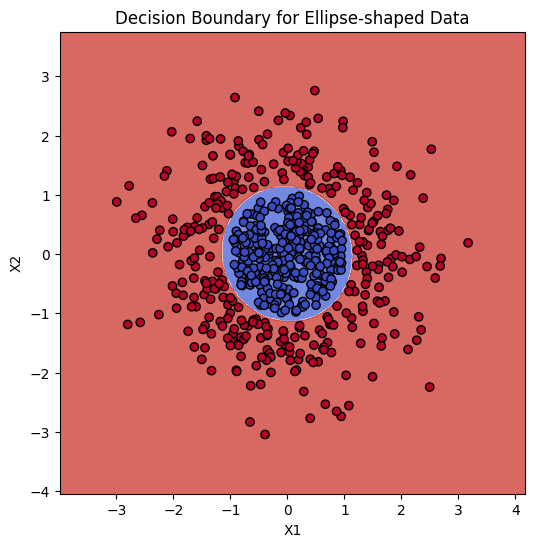

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Your functions and code for generating data

# Assuming generate_ellipse_data() and X_ellipse_transformed are already defined

# Train Logistic Regression model on the transformed features
model_ellipse = LogisticRegression().fit(X_ellipse_transformed, y_ellipse)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Transforming meshgrid points to match the shape of the transformed features
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_transformed = poly.transform(mesh_points)

    # Predictions on the meshgrid points
    Z = model.predict(mesh_points_transformed)
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary and data points
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('Decision Boundary for Ellipse-shaped Data')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Plot decision boundary
plot_decision_boundary(model_ellipse, X_ellipse, y_ellipse)


g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

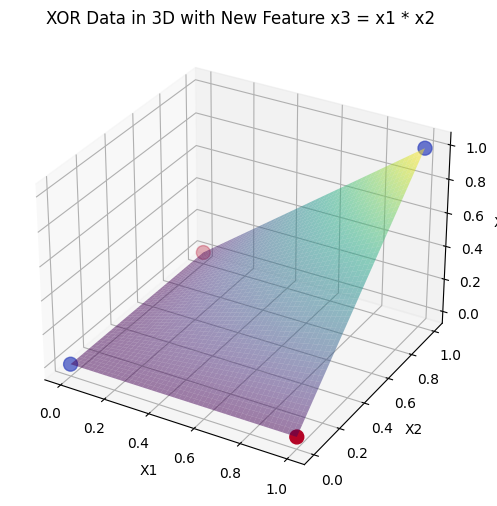

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# XOR data
def generate_xor_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([x[0] ^ x[1] for x in X])
    return X, Y

# Generate XOR data
X_xor, y_xor = generate_xor_data()

# Introduce a new feature x3 = x1 * x2
X_xor_3d = np.c_[X_xor, X_xor[:, 0] * X_xor[:, 1]]

# Create a grid of points in 3D
x1_vals = np.linspace(0, 1, 50)
x2_vals = np.linspace(0, 1, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
x3_mesh = x1_mesh * x2_mesh  # New feature x3 = x1 * x2

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting points in 3D
ax.scatter(X_xor_3d[:, 0], X_xor_3d[:, 1], X_xor_3d[:, 2], c=y_xor, cmap='coolwarm', s=100)
ax.plot_surface(x1_mesh, x2_mesh, x3_mesh, alpha=0.5, cmap='viridis')

# Labeling axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Show plot
plt.title('XOR Data in 3D with New Feature x3 = x1 * x2')
plt.show()


h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

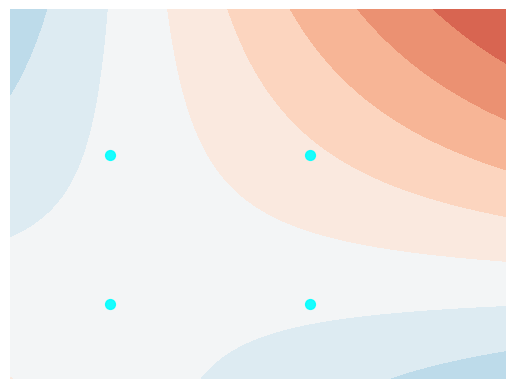

In [16]:
# Assuming X and Y contain your dataset
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)

# Creating a pipeline to sequentially apply PolynomialFeatures and LogisticRegression
model = make_pipeline(poly, lr).fit(X_xor, y_xor)

# Creating a meshgrid to plot decision boundary
h = .02
x_min, x_max = X_xor[:, 0].min() - .5, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - .5, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Predicting probabilities and classes for each point in the mesh
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)

# Plotting decision boundary and training points
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.scatter(X_xor[:, 0], X_xor[:, 1], color=y_xor, s=50, alpha=0.9)
ax.axis('off')
plt.show()


In [ ]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [ ]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = ...

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

...